In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train_df = pd.read_csv("./data/train.csv")
landmark_id = train_df["landmark_id"]
display(train_df.head())
print("Number of data:", train_df.shape[0])

,id,landmark_id
0,17660ef415d37059,1
1,92b6290d571448f6,1
2,cd41bf948edc0340,1
3,fb09f1e98c6d2f70,1
4,25c9dfc7ea69838d,7


Number of data: 1580470


In [3]:
landmark_count = landmark_id.value_counts()
landmark_df = pd.DataFrame({"landmark_id": landmark_count.index, "frequency": landmark_count.values})

print("No. of landmark:", landmark_df.count()[0])
print("\nTop 10 Landmarks")
display(landmark_df.head(10))
print("\n Least 10 Landmarks")
display(landmark_df.tail(10))

No. of landmark: 81313

Top 10 Landmarks


,landmark_id,frequency
0,138982,6272
1,126637,2231
2,20409,1758
3,83144,1741
4,113209,1135
5,177870,1088
6,194914,1073
7,149980,971
8,139894,966
9,1924,944



 Least 10 Landmarks


,landmark_id,frequency
81303,110417,2
81304,59905,2
81305,4171,2
81306,73532,2
81307,195143,2
81308,180503,2
81309,179834,2
81310,183115,2
81311,63266,2
81312,197219,2


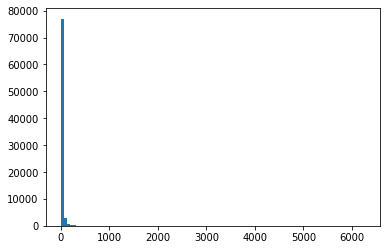

In [4]:
plt.hist(landmark_df["frequency"], bins=100)
plt.show()

In [56]:
total = landmark_df["frequency"].count()
l100 = landmark_df[landmark_df["frequency"] < 6]["frequency"].count()
g100 = landmark_df[landmark_df["frequency"] >= 6]["frequency"].count()

print("Landmark Samples <=100:", l100, f"({l100/total})")
print("Landmark Samples >100:", g100, f"({g100/total})")

Landmark Samples <=100: 24271 (0.2984885565653709)
Landmark Samples >100: 57042 (0.7015114434346291)


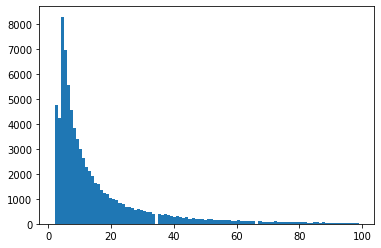

In [36]:
plt.hist(landmark_df[landmark_df["frequency"] < 100]["frequency"], bins=100)
plt.show()

In [34]:
img_cnt = landmark_df[landmark_df["frequency"] >= 7]["frequency"].count()
img_cnt

51471

In [8]:
print("Train:", img_cnt * 0.95 * 0.8)
print("Val:", img_cnt * 0.95 * 0.2)
print("Test:", img_cnt * 0.05)

Train: 1159017.48
Val: 289754.37
Test: 76251.15000000001


In [50]:
remain_id = landmark_df[landmark_df["frequency"] >= 6]["landmark_id"]
remain_data = train_df[train_df["landmark_id"].isin(remain_id)]

In [51]:
remain_data.shape
# remain_data.to_csv("./data/train_discard_5.csv", index=False)

(1490153, 2)

In [52]:
from sklearn.model_selection import train_test_split
x_data = remain_data["id"]
y_data = remain_data["landmark_id"]

train_ratio = 0.9 * 0.8
val_ratio = 0.9 * 0.2
test_ratio = 0.1
temp_test_ratio = test_ratio / (test_ratio + val_ratio)

x_train, temp_x, y_train, temp_y = train_test_split(x_data, y_data, train_size=train_ratio, test_size=val_ratio+test_ratio, random_state=4471, stratify=y_data)
x_val, x_test, y_val, y_test = train_test_split(temp_x, temp_y, test_size=temp_test_ratio, random_state=4471, stratify=temp_y)

In [53]:
print(len(y_train.unique()))
print(len(y_val.unique()))
print(len(y_test.unique()))

57042
57042
57042


In [55]:
print(len(x_train))
print(len(x_val))
print(len(x_test))

1072910
268227
149016


In [59]:
pd.DataFrame({"id": x_train, "landmark_id": y_train}).to_csv("./data/train_discard_6_train.csv")
pd.DataFrame({"id": x_val, "landmark_id": y_val}).to_csv("./data/train_discard_6_val.csv")
pd.DataFrame({"id": x_test, "landmark_id": y_test}).to_csv("./data/train_discard_6_test.csv")


In [58]:
split_train_df

,id,landmark_id,dataset
361807,ae9cfe7542766a40,45871,train
431004,f11eb2d65ab1a5b2,54387,train
1281602,7402f65d88b5dab7,165129,train
700732,e0957a409aa30722,89945,train
625556,17e8f3d9568185dd,80307,train
...,...,...,...
478757,d93d0fc72186a8d6,60887,train
639340,6c1fbfcab4e19d8e,82233,train
752785,4d390c2b23308526,97082,train
825579,576a1aca1d6348f1,106573,train
